## How to run a Python code cell

The next cell (below) is some simple Python code. Click on the cell, then the **Run** button above, to see the results.

In [6]:
theta = 0.2
print('The value of theta is', theta)

The value of theta is 0.2


* Note that each time you run a cell, Python "remembers" whatever actions you performed in that cell, e.g. in the cell above, we created a variable `theta` and set its value to 0.2.  So now if we run code in some other cell, that code can use that pre-defined variable.
* You can change the code in a cell at any time, but that won't have any effect on your Python data until you re-run that cell.

## Importing useful Python packages

One good thing about Python is that it has a lot of useful software packages for performing just about any kind of analysis.  For example, the `scipy.stats` package provides most statistical models.  To use it we first have to `import` it, then we can view its "directory" of useful functions, or start using them immediately.  Run the following code cell to do that:

In [34]:
from scipy import stats # "import scipy.stats" would also work
dir(stats) # in Python you can run the dir() function on anything to get a list of its attributes or functions

## Getting helpful information about a Python function

In the `stats` directory list above, you'll notice that it has a `binom` function.  In Python you can always run the `help()` function on anything to get information about how to use it.  Run the following code cell to do that:

In [33]:
help(stats.binom)

* Note that the quality of help documentation varies from package to package. 
* I personally find the `scipy.stats` documentation to be pretty crappy.  But at least it tells us (in this case) that `stats.binom()` takes two arguments **n** (the sample size, in our case the number of coin tosses) and **p** (the probability, in our case the probability of getting heads), and that we can calculate probability using its `pmf()` probability mass function etc.
* so we can create a binomial distribution for 10 tosses of a fair coin as follows:

In [9]:
fair10 = stats.binom(10, 0.5) # 10 tosses of a fair coin
print('the probability of getting 5 heads out of 10 tosses of a fair coin is', fair10.pmf(5))
unfair10 = stats.binom(10, theta) # loaded coin
print('the probability of getting 5 heads out of 10 tosses of the loaded coin is', unfair10.pmf(5))

the probability of getting 5 heads out of 10 tosses of a fair coin is 0.24609375000000025
the probability of getting 5 heads out of 10 tosses of the loaded coin is 0.02642411520000004


## Making a List using a FOR-loop

Computers are useful for performing repetitive operations e.g. on a lot of data.  In Python we can perform an operation on many items using a **for** loop, which takes items one by one from a container, assigns the item to a variable, and lets you do whatever you want to it in an indented "block" of code inside the for loop.  Let's use this to calculate the likelihoods for getting zero heads, one head, two heads etc.

In [10]:
for h in range(10): # h will have values 0, 1, 2 etc.
    print('the probability of getting %d heads is %f' % (h, fair10.pmf(h)))

the probability of getting 0 heads is 0.000977
the probability of getting 1 heads is 0.009766
the probability of getting 2 heads is 0.043945
the probability of getting 3 heads is 0.117188
the probability of getting 4 heads is 0.205078
the probability of getting 5 heads is 0.246094
the probability of getting 6 heads is 0.205078
the probability of getting 7 heads is 0.117188
the probability of getting 8 heads is 0.043945
the probability of getting 9 heads is 0.009766


## Storing data in a List

When working with larger datasets, we often want to store lots of results.  In Python one standard way to do that is in a **list**.  In the following code we store the likelihoods of getting any number of heads from a fair coin, then look up the value for 5 heads from our list:

In [11]:
fairP = [] # this creates a new, empty list
for h in range(10): # h will have values 0, 1, 2 etc.
    fairP.append(fair10.pmf(h)) # add a likelihood value to the list
print('5 heads:', fairP[5])
print('the whole list:', fairP)

5 heads: 0.24609375000000025
the whole list: [0.0009765625, 0.00976562500000001, 0.04394531249999999, 0.11718750000000014, 0.20507812500000022, 0.24609375000000025, 0.20507812500000022, 0.11718750000000014, 0.04394531249999999, 0.00976562500000001]


## Shortcut: using a List Comprehension

If your loop is just calculating one value per item, you can write it in one line using a so-called **list comprehension**, as follows:

In [12]:
unfairP = [unfair10.pmf(h) for h in range(10)] # does essentially the same thing as our for loop above
print('5 heads:', unfairP[5])
print('the whole list:', unfairP)

5 heads: 0.02642411520000004
the whole list: [0.1073741824, 0.2684354560000003, 0.301989888, 0.20132659200000022, 0.08808038400000008, 0.02642411520000004, 0.00550502400000001, 0.0007864320000000006, 7.372800000000005e-05, 4.096000000000007e-06]


## Challenge: calculate the posterior odds ratio for h=2

In the courselet exercises, you derived the equation for calculating the posterior odds ratio for the fair vs. unfair coins (assuming an uninformative prior).  If you need to, feel free to review that part of the courselet.  In the next cell, enter code to calculate that posterior odds ratio for the case where we observed two heads, simply using the `fairP` and `unfairP` lists we just created:

In [20]:
# assuming an uninformative prior, i.e. posterior odds is equal to likelihood odds
posterior_odds_h2 = fairP[2]/unfairP[2] 
print(posterior_odds_h2)

0.1455191522836685


**QUESTION**: Does this odds ratio favor the fair coin model or the loaded coin model?

**ANSWER**: This odds ratio favors the loaded coin model as the value of the odds ratio, 0.1455191522836685 << 1.

## Creating your own useful functions

Any operation that you're likely to use repeatedly should be written as a function that you can just call any time you want to perform that operation.  In Python we define a function with `def`, list the arguments it can accept, and then the code it will run (indented, just as in a for-loop).  Note that a function can itself contain for-loops or anything else that Python can do.

For example, if we want to graph a probability distribution for theta, we'll need a list of the possible values of theta that we want to graph.  Here's a simple function that makes a list of its possible values (from zero to one) subdivided into 100 intervals:

In [22]:
def theta_range(nint=100): # we use 100 intervals by default, but the user can pass a different value
    'get a list of equally spaced values from zero to one, split into nint intervals'
    thetas = [i / nint for i in range(nint + 1)] # build the list
    return thetas # this hands back the list we constructed

Now run the following code using your new function:

In [23]:
print('100 intervals', theta_range())
print('5 intervals', theta_range(5))
help(theta_range) # because we provided an (optional) documentation string as first line of our function, it gives us help!

100 intervals [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
5 intervals [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
Help on function theta_range in module __main__:

theta_range(nint=100)
    get a list of equally spaced values from zero to one, split into nint intervals



## Writing a likelihood function

Using what you've learned so far, write a function `theta_likelihood(h, n, thetas)` that returns a list of the likelihoods of getting **h** heads out of **n** coin flips for each of the possible values of theta contained in the input list **thetas**:

In [29]:
def theta_likelihood(h, n, thetas):
    probabilities = []
    for theta in thetas:
        probabilities.append(stats.binom(n, theta))
    likelihoods = []
    for probability in probabilities:
        likelihoods.append(probability.pmf(h))
    return likelihoods

## Importing Matplotlib

The `matplotlib` package is great for graphing data in a wide variety of ways.  Here's how we set it up to display "inline" graphs directly within Jupyter:

In [30]:
from matplotlib import pyplot
%matplotlib inline
# display large graph 20 cm X 20 cm
pyplot.rcParams["figure.figsize"] = 20, 20

## Graphing the Likelihood

Let's use your `theta_likelihood()` function to graph the likelihood for our **h=2, n=10** case:

Text(0, 0.5, 'p(H|N,theta)')

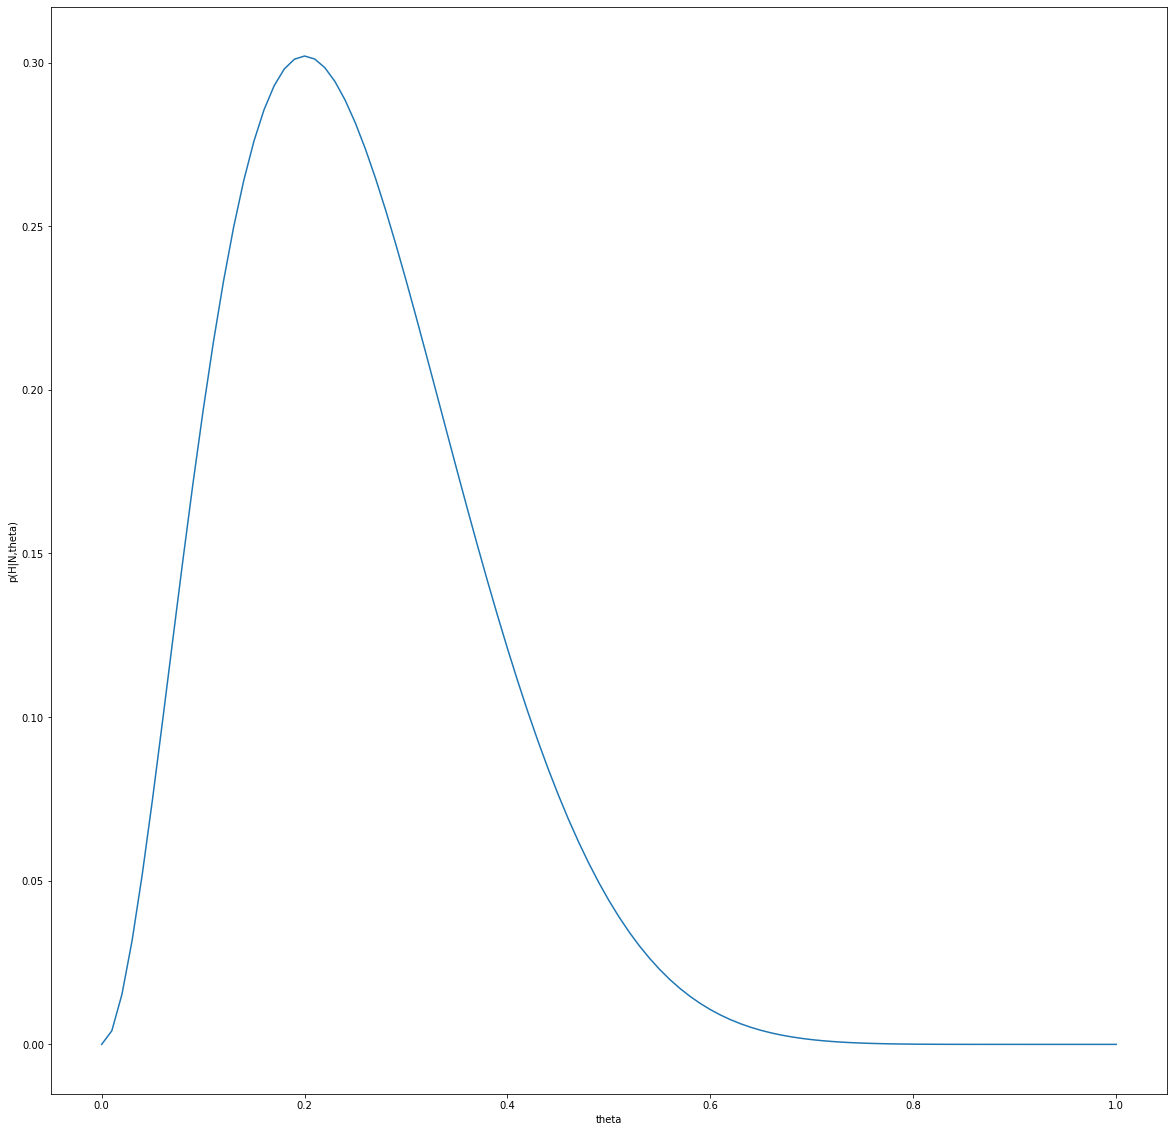

In [31]:
thetas = theta_range()
likelihoods = theta_likelihood(2, 10, thetas)
pyplot.plot(thetas, likelihoods) # first arg is our X values, second arg is our Y values
pyplot.xlabel('theta')
pyplot.ylabel('p(H|N,theta)')

**QUESTION**: What value of theta maximizes the likelihood of our observations?  Provide an intuitive explanation of your result.

**ANSWER**: The value of theta that maximizes likelihood of our observations is 0.2. An intuitive explanation is when we interpret the likelihood, it is the probability of observing 2 heads given that there were 10 tosses and theta is the probability of getting heads on any given coin toss. With theta being 0.2, the most likely outcome would be 2 heads out of 10 throws, which is what we observed. Even if we did the same experiment with 20 heads given 100 throws, the most likely value for theta would be the same, as it depends on the actual proportion of heads we observed.

## Graphing the Posterior distribution for different sample sizes

The following code converts the likelihood to a properly normalized posterior probability distribution for theta.  We then graph the posterior distributions for three cases:

* H=2, N=10
* H=20, N=100
* H=200, N=1000

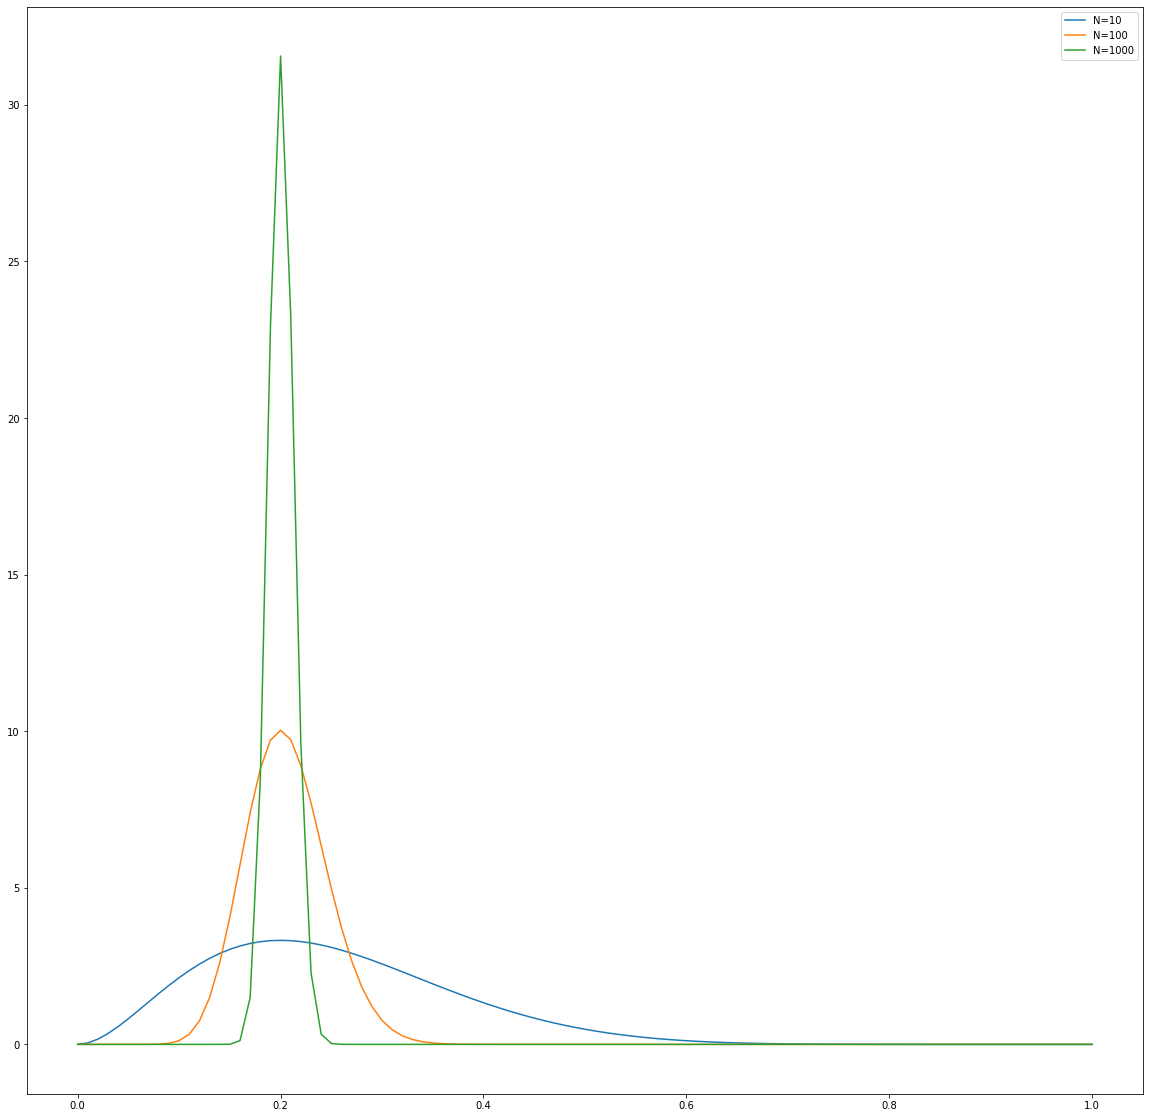

In [32]:
def normalize_posterior(likelihoods):
    'get normalized posterior density from input likelihoods'
    normalization = sum(likelihoods) / (len(likelihoods) - 1)
    posterior = [l / normalization for l in likelihoods]
    return posterior

post10 = normalize_posterior(theta_likelihood(2, 10, thetas))
post100 = normalize_posterior(theta_likelihood(20, 100, thetas))
post1000 = normalize_posterior(theta_likelihood(200, 1000, thetas))

pyplot.plot(thetas, post10, label='N=10') # we can plot many data on the same graph
pyplot.plot(thetas, post100, label='N=100')
pyplot.plot(thetas, post1000, label='N=1000')
pyplot.legend() # display a legend with the label of each dataset

**QUESTION**: What is the effect of increasing sample size on the posterior distribution for theta?

**ANSWER**: By increasing sample size on the posterior distribution for theta, the variance decreases and the distribution begins to be more precise, as the probability mass begins to increase and center on 0.2.

**QUESTION**: Provide an intuitive explanation for why you think this is happening, and what it means.

**ANSWER**: An intuitive explanation for why this is happening is take for instance, if you have a smaller sample size, many of the tosses can be subject to unusuality due to chance. This means, as you increase the sample size, this chance begins to be outweighed as likelihood begins to take over. The resulting distribution after increasing sample size is more powerful and standard error is lower.